   ## Big_mart_sales

**Building an End-to-End Solution for Big Mart Sales Prediction**

The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**steps:**

Data preparation: (cleaning, encoding, scaling)

EDA: (Descriptive Statistics to understand the relationship btw features)

Feature Engineering: (selecting the most relevant features)

Model Selection: (selecting the best algorithm)

Hyperparameter Tuning: (Grid Search, Randomized Search, HyperOpt)

Making Predictions


**Data Preparation**

In [1]:
#import required libraries
import pandas as pd 
import numpy as np
df=pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#check for duplicate records
df.duplicated().sum()

0

In [5]:
#check null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Columns Item_Weight and Outlet_Size have null values 

Filling null values with mean and mode respectively

In [6]:
print(df["Item_Weight"].mean())
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)

print(df["Outlet_Size"].mode()[0])
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace = True)

df.isnull().sum()

12.857645184136183
Medium


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**EDA**

Now consider categorical columns 

In [7]:
# Check for total count of unique values 
for col in df.dtypes.index:
    if df[col].dtype == 'object':
        print('{}'.format(col),df[col].nunique())
    

Item_Identifier 1559
Item_Fat_Content 5
Item_Type 16
Outlet_Identifier 10
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4


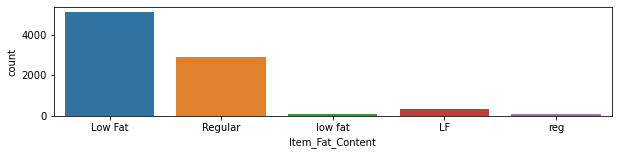

In [8]:
# visual representation of count of each unique value in 'Item_Fat_Content' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,2))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()


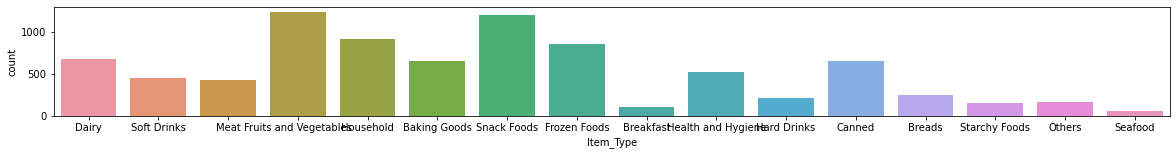

In [9]:
# visual representation of count of each unique value in 'Item_Type' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,2))
sns.countplot(x='Item_Type',data=df)
plt.show()


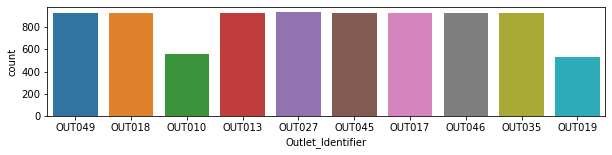

In [10]:
# visual representation of count of each unique value in 'Outlet_Identifier' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,2))
sns.countplot(x='Outlet_Identifier',data=df)
plt.show()

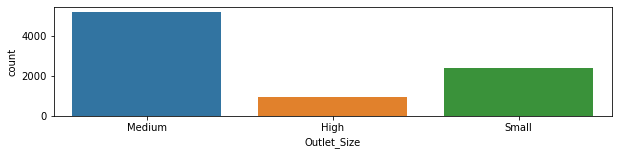

In [11]:
# visual representation of count of each unique value in 'Outlet_Size' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,2))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

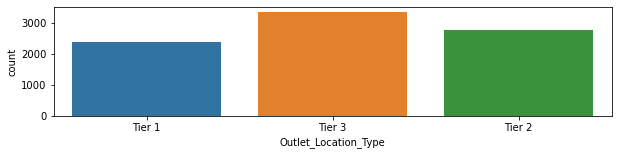

In [12]:
# visual representation of count of each unique value in 'Outlet_Location_Type' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,2))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

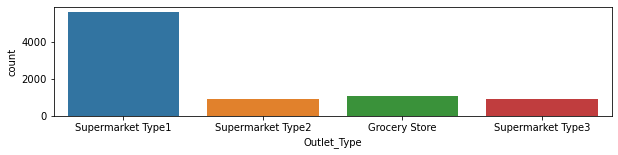

In [13]:
# visual representation of count of each unique value in 'Outlet_Type' column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,2))
sns.countplot(x='Outlet_Type',data=df)
plt.show()

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
#check skewness
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

columns Item_Visibility and Item_Outlet_Sales are positively skewed

below graphs show the visual representation of normal distribution

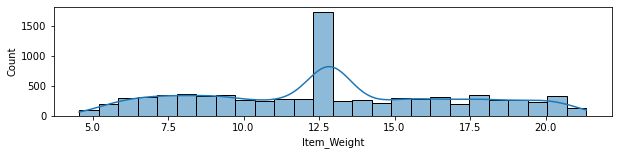

In [16]:
plt.figure(figsize=(10,2))
sns.histplot(x='Item_Weight',data=df, kde=True)
plt.show()

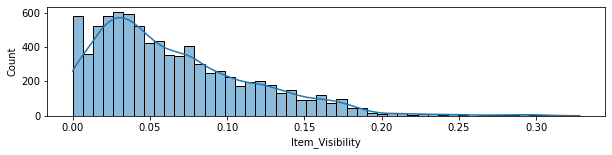

In [17]:
plt.figure(figsize=(10,2))
sns.histplot(x='Item_Visibility',data=df, kde=True)
plt.show()

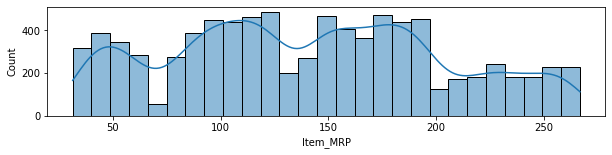

In [18]:
plt.figure(figsize=(10,2))
sns.histplot(x='Item_MRP',data=df, kde=True)
plt.show()

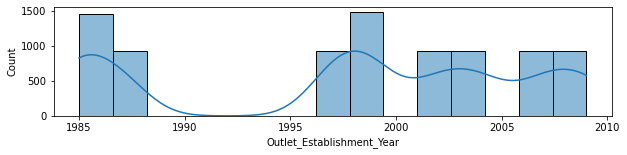

In [19]:
plt.figure(figsize=(10,2))
sns.histplot(x='Outlet_Establishment_Year',data=df, kde=True)
plt.show()

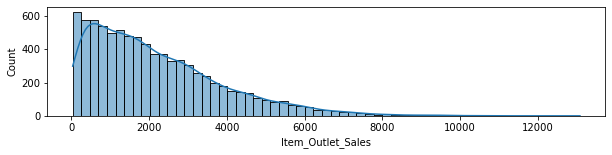

In [20]:
plt.figure(figsize=(10,2))
sns.histplot(x='Item_Outlet_Sales',data=df, kde=True)
plt.show()

In [21]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,2

Now consider the numeric columns 

In [23]:
df.columns[df.dtypes.isin([np.dtype('int64'), np.dtype('float64')])]

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Creating a function which gives the total count of outliers present in numeric columns



In [24]:
def find_outliers (col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    
    outliers = df[(df[col_name] < Q1 - 1.5 * IQR) | (df[col_name] > Q3 + 1.5 * IQR)]

    print("Total count of outliers in", col_name, outliers.shape[0])
    

In [25]:
find_outliers('Item_Weight')
find_outliers('Item_Visibility')
find_outliers('Item_MRP')
find_outliers('Outlet_Establishment_Year')
find_outliers('Item_Outlet_Sales')

Total count of outliers in Item_Weight 0
Total count of outliers in Item_Visibility 144
Total count of outliers in Item_MRP 0
Total count of outliers in Outlet_Establishment_Year 0
Total count of outliers in Item_Outlet_Sales 186


Below plots shows the visual representation of outliers

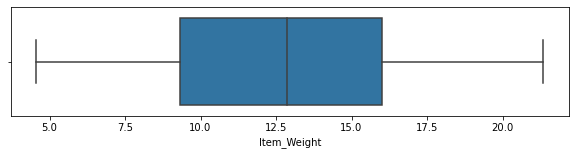

Total count of outliers in Item_Weight 0


In [26]:
sns.boxplot(x=df['Item_Weight'])
plt.show()

find_outliers('Item_Weight')

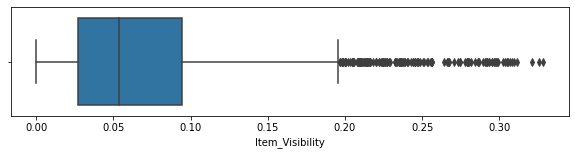

Total count of outliers in Item_Visibility 144


In [27]:
sns.boxplot(x=df['Item_Visibility'])
plt.show()

find_outliers('Item_Visibility')

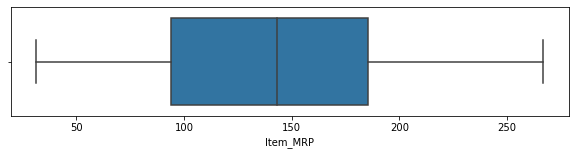

Total count of outliers in Item_MRP 0


In [28]:
sns.boxplot(x=df['Item_MRP'])
plt.show()

find_outliers('Item_MRP')

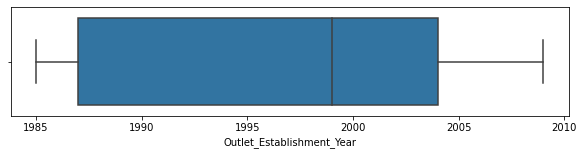

Total count of outliers in Outlet_Establishment_Year 0


In [29]:
sns.boxplot(x=df['Outlet_Establishment_Year'])
plt.show()

find_outliers('Outlet_Establishment_Year')

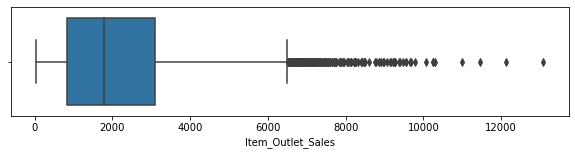

Total count of outliers in Item_Outlet_Sales 186


In [30]:
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.show()

find_outliers('Item_Outlet_Sales')

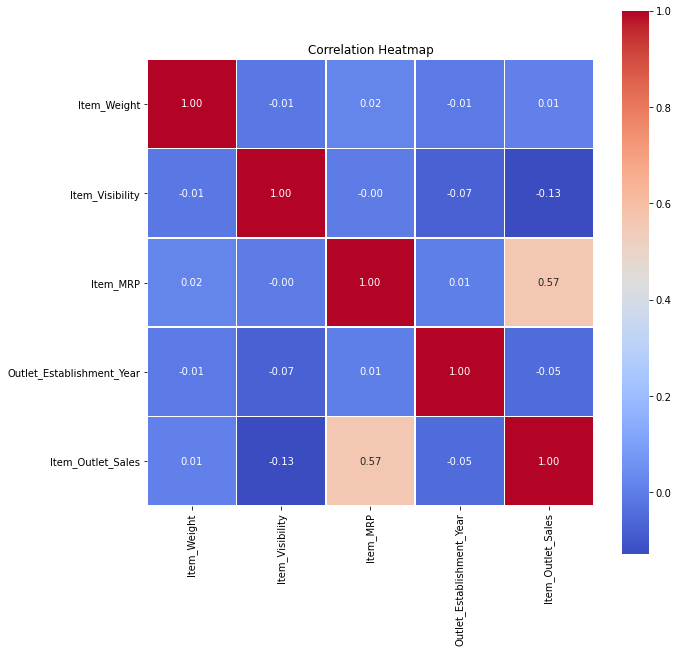

In [31]:
#check the correlation between numeric columns
corr=df.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f',square=True, linewidths=.5, ax=ax)
plt.title('Correlation Heatmap')
plt.show()


**Feature Engineering**

Now taking the categorical columns or the columns whose dtype is object and convert them to numeric

In [32]:
df.columns[df.dtypes.isin([np.dtype('object')])]

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [33]:
df['Item_Identifier'].nunique()

1559

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [35]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
print(df['Item_Type'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [37]:
print(df['Outlet_Identifier'].value_counts())

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Applying One hot encoding to the below columns

In [38]:
print(df['Outlet_Size'].value_counts()) ## APPLY ONE HOT ENCODING
print("\n",df['Outlet_Location_Type'].value_counts()) ## APPLY ONE HOT ENCODING
print("\n",df['Outlet_Type'].value_counts()) ## APPLY ONE HOT ENCODING
print("\n",df['Item_Fat_Content'].value_counts())  ## APPLY ONE HOT ENCODING

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Applying Label encoding to the below columns

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

In [40]:
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder object
onehotencoder = OneHotEncoder()

# Fit and transform the categorical column in the train set
Outlet_Size_encoded = onehotencoder.fit_transform(df['Outlet_Size'].values.reshape(-1,1)).toarray()

# Get the list of encoded column names
encoded_column_names = onehotencoder.get_feature_names(['Outlet_Size'])

# Create new dataframes with the encoded columns
train_cat_df = pd.DataFrame(Outlet_Size_encoded, columns=encoded_column_names)
train_cat_df.head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [41]:
# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, train_cat_df], axis=1)

#droping the Outlet_Size column 
df= df.drop(['Outlet_Size'], axis=1) 

In [42]:
# Fit and transform the categorical column in the train set
Outlet_Size_encoded = onehotencoder.fit_transform(df['Outlet_Location_Type'].values.reshape(-1,1)).toarray()

# Get the list of encoded column names
encoded_column_names = onehotencoder.get_feature_names(['Outlet_Location_Type'])

# Create new dataframes with the encoded columns
train_cat_df = pd.DataFrame(Outlet_Size_encoded, columns=encoded_column_names)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, train_cat_df], axis=1)

#droping the Outlet_Location_Type column 
df= df.drop(['Outlet_Location_Type'], axis=1) 

In [43]:
# Fit and transform the categorical column in the train set
Outlet_Size_encoded = onehotencoder.fit_transform(df['Outlet_Type'].values.reshape(-1,1)).toarray()

# Get the list of encoded column names
encoded_column_names = onehotencoder.get_feature_names(['Outlet_Type'])

# Create new dataframes with the encoded columns
train_cat_df = pd.DataFrame(Outlet_Size_encoded, columns=encoded_column_names)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, train_cat_df], axis=1)

#droping the Outlet_Type column 
df= df.drop(['Outlet_Type'], axis=1) 

In [46]:
# Fit and transform the categorical column in the train set
Outlet_Size_encoded = onehotencoder.fit_transform(df['Item_Fat_Content'].values.reshape(-1,1)).toarray()

# Get the list of encoded column names
encoded_column_names = onehotencoder.get_feature_names(['Item_Fat_Content'])

# Create new dataframes with the encoded columns
train_cat_df = pd.DataFrame(Outlet_Size_encoded, columns=encoded_column_names)

# concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, train_cat_df], axis=1)

#droping the Item_Fat_Content column 
df= df.drop(['Item_Fat_Content'], axis=1) 

In [47]:
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular'],
      dtype='object')


In [48]:
#check the data types of our dataframe after conversion
df.dtypes

Item_Identifier                    int32
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int32
Item_MRP                         float64
Outlet_Identifier                  int32
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Outlet_Size_High                 float64
Outlet_Size_Medium               float64
Outlet_Size_Small                float64
Outlet_Location_Type_Tier 1      float64
Outlet_Location_Type_Tier 2      float64
Outlet_Location_Type_Tier 3      float64
Outlet_Type_Grocery Store        float64
Outlet_Type_Supermarket Type1    float64
Outlet_Type_Supermarket Type2    float64
Outlet_Type_Supermarket Type3    float64
Item_Fat_Content_Low Fat         float64
Item_Fat_Content_Regular         float64
dtype: object

In [49]:
#REMOVING OUTLIER IN ITEM_VISIBILITY COLUMN

# from scipy import stats
# import numpy as np

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(df[['Item_Visibility']])

# transform the column in both train and test data
df['Item_Visibility'] = pt.transform(df[['Item_Visibility']])

df['Item_Visibility'].skew()

0.1242791133751681

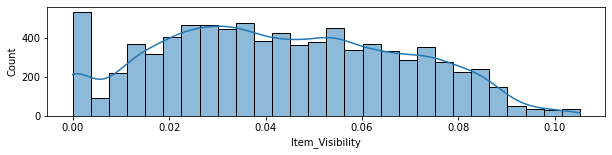

SKEWNESS OF COL Item_Visibility {} 0.1242791133751681


In [50]:
plt.figure(figsize = (10,2)) #size => 10 inches wide and 2 inches high.

# Visualize the distribution of the Item_Visibility column using a histogram
sns.histplot(data=df, x="Item_Visibility", kde=True)
plt.show()
print("SKEWNESS OF COL Item_Visibility {}",df["Item_Visibility"].skew())

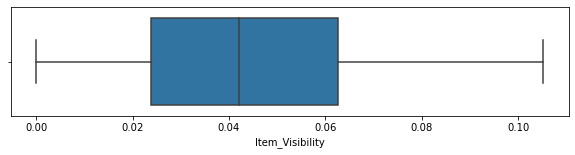

Total count of outliers in Item_Visibility 0


In [51]:
sns.boxplot(x=df['Item_Visibility'])
plt.show()

find_outliers('Item_Visibility')

**Model Selection**

In [52]:
pip install xgboost

In [53]:
pip install lightgbm

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [55]:
# separate the target variable and the features
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis=1)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of models to evaluate
models = []
models.append(('LR', LinearRegression()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))

In [56]:
df.dtypes

Item_Identifier                    int32
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int32
Item_MRP                         float64
Outlet_Identifier                  int32
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Outlet_Size_High                 float64
Outlet_Size_Medium               float64
Outlet_Size_Small                float64
Outlet_Location_Type_Tier 1      float64
Outlet_Location_Type_Tier 2      float64
Outlet_Location_Type_Tier 3      float64
Outlet_Type_Grocery Store        float64
Outlet_Type_Supermarket Type1    float64
Outlet_Type_Supermarket Type2    float64
Outlet_Type_Supermarket Type3    float64
Item_Fat_Content_Low Fat         float64
Item_Fat_Content_Regular         float64
dtype: object

In [57]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

LR: 0.5567083229161867 (0.006472537828363946)
XGB: 0.5164407822770103 (0.01678962739503657)
LGBM: 0.5668019166444382 (0.01839125671743892)


In [58]:
from sklearn.metrics import r2_score

**Hyperparameter tuning**

In [59]:
# select the best model
best_model = XGBRegressor()
params = {'learning_rate': [0.05,0.007, 0.1, 0.15],'n_estimators' : [500,750,100]}
grid_search = GridSearchCV(best_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [60]:
# print the best model's parameters
print("Best Model's Parameters: ", grid_search.best_params_)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Best Model's RMSE on Test Set: {rmse}")

Best Model's Parameters:  {'learning_rate': 0.007, 'n_estimators': 500}
Best Model's RMSE on Test Set: 1038.3106437384863


In [64]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f"Best Model's r2_score on Test Set: {r2}")

Best Model's r2_score on Test Set: 0.6033477314036004


In [67]:
# Sales predictions
y_pred

array([1168.8638 ,  691.889  ,  705.519  , ...,  674.32776,  642.30316,
       1604.6143 ], dtype=float32)

**conclusion**

We got root mean square value = 1038.3106437384863 and R-squared value = 0.6033477314036004

we have successfully made predictions on sales.

